<a href="https://colab.research.google.com/github/sajad13901/Statistics_Wasserman/blob/main/Wasserman_Chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Chapter 9, problem 2, part d
import numpy as np

a = 1.
b = 3.
n = 10
n_sims = 10**6

samples = np.random.uniform(low=a, high=b, size=[n_sims, n])
a_mle = np.min(samples, axis=1)
b_mle = np.max(samples, axis=1)

tau_mle = (a_mle + b_mle)/2 
tau = (a + b)/2
mse = np.mean((tau_mle - tau)**2)
print('Simulated MSE: %.3f' %mse)


Simulated MSE: 0.015


In [21]:
# Chapter 9, problem 3, part c
import numpy as np
from scipy.stats import norm

data = np.array([ 3.23, -2.50,  1.88, -0.68,  4.43,  0.17,
                  1.03, -0.07, -0.01,  0.76,  1.76,  3.18,
                  0.33, -0.31,  0.30, -0.61,  1.52,  5.43,
                  1.54,  2.28,  0.42,  2.33, -1.03,  4.00,
                  0.39])

# calc se using delta method
n = data.size
c = norm.ppf(0.95)
se_delta_method =  np.std(data) * np.sqrt((1 + 0.5*c**2)/n)
print('se delta method: %.3f' %se_delta_method)

# calc se using parametric bootstrap
n_sim = 10**5
samples = np.std(data) * np.random.randn(n_sims, n) + np.mean(data)
tau_boot = c * np.std(samples, axis=1) + np.mean(samples, axis=1)
print('se param bootstrap: %.3f' %np.std(tau_boot))

se delta method: 0.558
se param bootstrap: 0.556


In [28]:
# Chapter 9, problem 7, part d
import numpy as np
from scipy.stats import norm

n = 200
x1, x2 = 160., 148.
p1_hat = x1/n
p2_hat = x2/n
psi_hat = p1_hat - p2_hat

# calc C.I. using delta method
se_delta = np.sqrt(p1_hat*(1-p1_hat)/n + p2_hat*(1-p2_hat)/n)
c = norm.ppf(0.95)
print('90%% C.I. using delta method (%.3f, %.3f)' %(psi_hat-c*se_delta, psi_hat+c*se_delta))

# calc C.I. using parametric bootstrap
n_sim = 10**5
x1_samples = np.random.binomial(n, p1_hat, size=n_sim)
x2_samples = np.random.binomial(n, p2_hat, size=n_sim)
tau_boot = x1_samples/n - x2_samples/n
se_boot = np.std(tau_boot)
print('90%% C.I. using param bootstrap (%.3f, %.3f)' %(psi_hat - c*se_boot, psi_hat + c*se_boot))


90% C.I. using delta method (-0.009, 0.129)
90% C.I. using param bootstrap (-0.009, 0.129)


95% C.I. using delta method (137.373, 204.350)
95% C.I. using param bootstrap (136.969, 204.754)
95% C.I. using param bootstrap (139.591, 202.132)
theta_hat true: 148.413
theta_hat MLE : 170.862


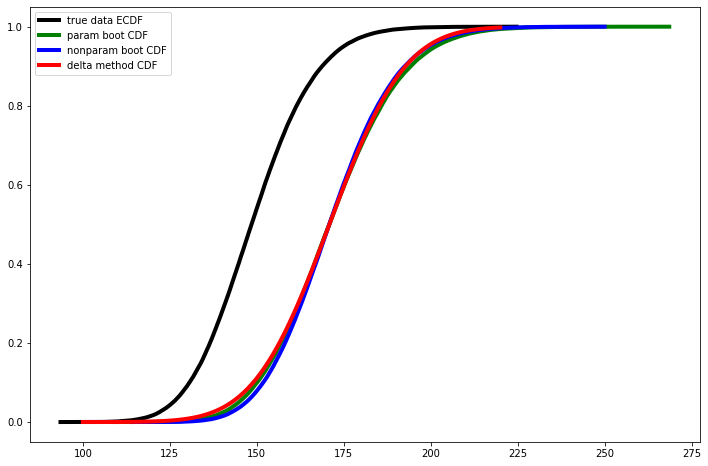

In [83]:
# Chapter 9, problem 9, part a & b
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 100
mu = 5.
data = mu + np.random.randn(n)
x_bar = np.mean(data)
theta_hat = np.exp(x_bar)
c = norm.ppf(0.975)

# delta method
se_delta = theta_hat/np.sqrt(n) 
print('95%% C.I. using delta method (%.3f, %.3f)' %(theta_hat - c*se_delta, theta_hat + c*se_delta))

# param bootstrap
n_sim = 10**5
samples_param = x_bar + np.random.randn(n_sim, n)
theta_boot = np.exp(np.mean(samples_param, axis=1))
se_boot = np.std(theta_boot)
print('95%% C.I. using param bootstrap (%.3f, %.3f)' %(theta_hat - c*se_boot, theta_hat + c*se_boot))

# non-param bootstrap
theta_boot_nonparam = []
for _ in range(n_sim):
    tmp_data = np.random.choice(data, size=n, replace=True)
    theta_boot_nonparam.append(np.exp(np.mean(tmp_data)))
se_boot_nonparam = np.std(theta_boot_nonparam)
print('95%% C.I. using param bootstrap (%.3f, %.3f)' %(theta_hat - c*se_boot_nonparam, theta_hat + c*se_boot_nonparam))


# true dist. of theta_hat, simulation 
samples = mu + np.random.randn(n_sim, n)
x_bar_samples = np.mean(samples, axis=1)
x_cdf_org = np.sort(np.exp(x_bar_samples))
y_cdf_org = np.linspace(1/n_sim, 1, n_sim)

# dist. of theta_hat, delta method 
x_cdf_delta = np.linspace(100, 220, n)
y_cdf_delta = norm.cdf((x_cdf_delta-theta_hat)/se_delta)

# dist. of theta_hat, param. bootstratp 
x_cdf_param = np.sort(theta_boot)
y_cdf_param = np.linspace(1/n_sim, 1, n_sim)

# dist. of theta_hat, non-param. bootstratp 
x_cdf_nonparam = np.sort(theta_boot_nonparam)
y_cdf_nonparam = np.linspace(1/n_sim, 1, n_sim)

print('theta_hat true: %.3f' %np.exp(mu))
print('theta_hat MLE : %.3f' %theta_hat)

plt.figure(figsize=(12,8))
plt.plot(x_cdf_org, y_cdf_org,           'k-', lw=4,  label='true data ECDF')
plt.plot(x_cdf_param, y_cdf_param,       'g-', lw=4, label='param boot CDF')
plt.plot(x_cdf_nonparam, y_cdf_nonparam, 'b-', lw=4, label='nonparam boot CDF')
plt.plot(x_cdf_delta, y_cdf_delta,       'r-', lw=4, label='delta method CDF')
plt.legend(loc='best')
plt.show()


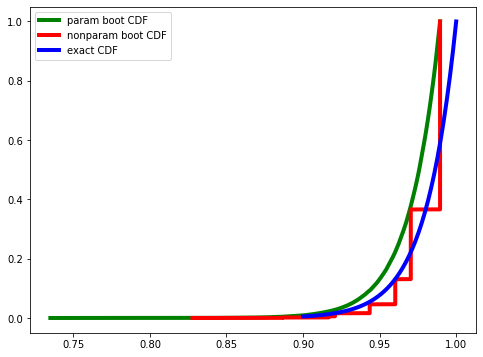

In [89]:
# Chapter 9, problem 10, part a
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

n = 50
data = np.random.uniform(0, 1, n)
theta_hat = np.max(data)

# dist. of theta_hat, formula
x_cdf_exact = np.linspace(.9, 1, n)
y_cdf_exact = x_cdf_delta**n

# dist. of theta_hat, param. bootstratp 
n_sim = 10**5
samples_param = np.random.uniform(0, theta_hat, [n_sim, n])
theta_boot = np.max(samples_param, axis=1)
x_cdf_param = np.sort(theta_boot)
y_cdf_param = np.linspace(1/n_sim, 1, n_sim)

# dist. of theta_hat, non-param. bootstratp 
theta_boot_nonparam = []
for _ in range(n_sim):
    tmp_data = np.random.choice(data, size=n, replace=True)
    theta_boot_nonparam.append(np.max(tmp_data))
x_cdf_nonparam = np.sort(theta_boot_nonparam)
y_cdf_nonparam = np.linspace(1/n_sim, 1, n_sim)

plt.figure(figsize=(8,6))
plt.plot(x_cdf_param, y_cdf_param,       'g-', lw=4, label='param boot CDF')
plt.plot(x_cdf_nonparam, y_cdf_nonparam, 'r-', lw=4, label='nonparam boot CDF')
plt.plot(x_cdf_exact, y_cdf_exact,       'b-', lw=4, label='exact CDF')
plt.legend(loc='best')
plt.show()
